In [97]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import joblib
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [98]:
df = pd.read_csv('cleaned_census.csv')
df.head(1)


,Unnamed: 0,nchild,nchild_under_5,nsibs,eldch,sex,age,occ1950,ed_group_h
0,0,0,0,0,0,Male,43,Operative and kindred workers (nec),1


In [99]:
df = df.drop(['Unnamed: 0', 'ed_group_h',], axis=1)

In [100]:
df.head(10)

,nchild,nchild_under_5,nsibs,eldch,sex,age,occ1950
0,0,0,0,0,Male,43,Operative and kindred workers (nec)
1,0,0,0,0,Male,28,"Managers, officials, and proprietors (nec)"
2,3,0,0,15,Male,36,Foremen (nec)
3,0,0,0,0,Male,48,"Managers, officials, and proprietors (nec)"
4,2,2,0,2,Male,27,Salesmen and sales clerks (nec)
5,0,0,0,0,Male,60,Purchasing agents and buyers (nec)
6,0,0,0,0,Male,69,"Lumbermen, raftsmen, and woodchoppers"
7,0,0,0,0,Male,44,"Managers, officials, and proprietors (nec)"
8,0,0,1,0,Male,54,Bookkeepers
9,0,0,0,0,Male,73,Foremen (nec)


In [101]:
df.dtypes

nchild             int64
nchild_under_5     int64
nsibs              int64
eldch              int64
sex               object
age                int64
occ1950           object
dtype: object

In [134]:
x = df.values
x

array([[0, 0, 0, ..., 43, 'Operative and kindred workers (nec)', 3],
       [0, 0, 0, ..., 28, 'Managers, officials, and proprietors (nec)',
        0],
       [3, 0, 0, ..., 36, 'Foremen (nec)', 3],
       ...,
       [2, 0, 0, ..., 37, 'Buyers and dept heads, store', 3],
       [6, 3, 0, ..., 29, 'Dispatchers and starters, vehicle', 0],
       [1, 0, 0, ..., 46, 'Managers, officials, and proprietors (nec)',
        3]], dtype=object)

In [103]:
observation = x[0]
observation


array([0, 0, 0, 0, 'Male', 43, 'Operative and kindred workers (nec)'],
      dtype=object)

In [105]:
classifier = joblib.load('model_proto_features.pkl')
print("model_proto_features classifier has been loaded")

model_proto_features classifier has been loaded


In [131]:
new_observation = [[0,0,0,0,'Male', 42, 'Chemists']]

In [132]:
obs = np.asanyarray(new_observation)

In [133]:
classifier.predict(obs, categorical=[4,6])

array([1], dtype=uint16)

In [111]:
cluster = kproto.labels_
df.head(2)
df['clusters'] = cluster

In [130]:
census_new = pd.read_csv('cleaned_census.csv')
census_new['clusters'] = cluster
census_new= census_new.drop(['Unnamed: 0'], axis=1)
census_new.to_csv("dataset_clustered.csv")
census_new.head(5)

,nchild,nchild_under_5,nsibs,eldch,sex,age,occ1950,ed_group_h,clusters
0,0,0,0,0,Male,43,Operative and kindred workers (nec),1,3
1,0,0,0,0,Male,28,"Managers, officials, and proprietors (nec)",2,0
2,3,0,0,15,Male,36,Foremen (nec),1,3
3,0,0,0,0,Male,48,"Managers, officials, and proprietors (nec)",1,1
4,2,2,0,2,Male,27,Salesmen and sales clerks (nec),1,0


In [113]:
print(kproto.cost_)
print(kproto.n_iter_)
print(kproto.labels_)

14065544.128628844
9
[3 0 3 ... 3 0 3]


C:\Users\48733\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


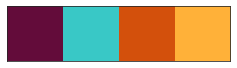

In [86]:
import seaborn as sns
%matplotlib inline

plt.rc('font', size=16)
sns.set_style('white')
#define a custom palette 
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [125]:
n= 50

print(kproto.cluster_centroids_[0][0])

[1.61355055e+00 9.82787045e-01 1.72661360e-02 3.62773218e+00
 2.95096701e+01 2.04518622e+00]


In [ ]:
n = 5

groups = { 'A': ()}